# i. Perkenalan

Nama: Satriya Fauzan Adhim

Batch :019

# Background

Resiko credit default merupakan salah satu permasalahan yang sering dijumpai di dalam dunia bisnis finansial terutama perusahaan keungan seperti salah satu perusahaan finansial di Indonesia yaitu Home Credit Indonesia. Dalam pemberian pinjaman, perusahaan perkreditan perlu untuk melakukan evaluasi terhadap pelanggan yang akan melakukan pijaman, untuk mengetahui apakah pelanggan memiliki kemampuan untuk membayar kembali pinjaman sesuai dengan kesepakatan. Salah satu cara untuk mengatasi risiko kredit default adalah dengan menggunakan model prediksi yang dapat mengidentifikasi calon debitur yang berpotensi mengalami kesulitan dalam membayar pinjaman.

# ii. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score



import os
import pickle, joblib
import json
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [3]:
# Menginput list data yang digunakan dari direktori
print(os.listdir("data"))

['app.py', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'Home_credit.ipynb', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'Table_concate.ipynb']


In [4]:
application_train = pd.read_csv('data/application_train.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
application_test = pd.read_csv('data/application_test.csv')

In [5]:
# Melihat ukuran data pada setiap tabel
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [8]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [13]:
unique_values = bureau['CREDIT_ACTIVE'].unique()
print("List unique values in column CREDIT_ACTIVE:")
print(unique_values)


List unique values in column CREDIT_ACTIVE:
['Closed' 'Active' 'Sold' 'Bad debt']


## 3.2 Menghilangkan duplikasi nilai SK_ID_CURR pada dataset yang digunakan

Berdasarkan pengamatan data pada setiap tabel diatas, dapat terlihat bahwa terdapat duplikasi nilai SK_ID_CURR pada dataset-dataset yang ada, maka selanjutnya duplikasi tersebut akan dihilangkan.

### POS_CASH_balance

In [14]:
# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
POS_CASH_balance = POS_CASH_balance.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
POS_CASH_balance.shape

(337252, 8)

### previous_application

In [15]:
# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
previous_application = previous_application.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
previous_application.shape

(338857, 37)

### installments_payments

In [16]:
# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
installments_payments = installments_payments.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
installments_payments.shape

(339587, 8)

### credit_card_balance

In [17]:
# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
credit_card_balance = credit_card_balance.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
credit_card_balance.shape

(103558, 23)

### bureau

In [18]:
# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
bureau = bureau.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
bureau.shape

(305811, 17)

### bureau_balance

In [19]:
# Menggabungkan dataset bureau dan bureau_balance berdasarkan kolom 'SK_ID_BUREAU' untuk memasukkan kolom 'SK_ID_BUREAU'
bureau_balance = pd.merge(bureau_balance, bureau[['SK_ID_CURR','SK_ID_BUREAU']], on='SK_ID_BUREAU', how='inner')

# Menghapus nilai yang sama pada kolom 'SK_ID_CURR'
bureau_balance = bureau_balance.drop_duplicates(subset=['SK_ID_CURR'])

# Menampilkan hasil
bureau_balance.shape

(134482, 4)

## Menggabungkan dataset menjadi 1 dataset dengan key column 'SK_ID_CURR'

In [20]:
# Menggabungkan dataset POS_CASH_balance ke dalam dataset application_train
merged_data = pd.merge(application_train, POS_CASH_balance, on='SK_ID_CURR', how='left', suffixes=('_app', '_pos'))

# Menggabungkan dataset bureau_balance ke dalam dataset yang telah digabungkan sebelumnya
merged_data = pd.merge(merged_data, bureau_balance, on='SK_ID_CURR', how='left', suffixes=('', '_bureau'))

# Menggabungkan dataset previous_application ke dalam dataset yang telah digabungkan sebelumnya
merged_data = pd.merge(merged_data, previous_application, on='SK_ID_CURR', how='left', suffixes=('', '_prev'))

# Menggabungkan dataset installments_payments ke dalam dataset yang telah digabungkan sebelumnya
merged_data = pd.merge(merged_data, installments_payments, on='SK_ID_CURR', how='left', suffixes=('', '_installments'))

# Menggabungkan dataset credit_card_balance ke dalam dataset yang telah digabungkan sebelumnya
merged_data = pd.merge(merged_data, credit_card_balance, on='SK_ID_CURR', how='left', suffixes=('', '_credit'))

# Menggabungkan dataset bureau ke dalam dataset yang telah digabungkan sebelumnya
merged_data = pd.merge(merged_data, bureau, on='SK_ID_CURR', how='left', suffixes=('', '_bureau_main'))

application_train_merged = merged_data

# Menampilkan hasil akhir
application_train_merged.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_bureau_main
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-683.0,NaN,0.0,94500.0,0.0,0.0,0.0,Consumer credit,-682.0,NaN


In [21]:
application_train_merged.shape

(307511, 213)

In [22]:
application_train_merged.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## 3.1 Mengecek missing data pada dataset

### Missing data application_train_merged

In [23]:
total = application_train_merged.isnull().sum().sort_values(ascending = False)
percent = (application_train_merged.isnull().sum()/application_train_merged.isnull().count()*100).sort_values(ascending = False)
missing_application_train_merged_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_merged_data.head(20)

,Total,Percent
RATE_INTEREST_PRIVILEGED,305881,99.469938
RATE_INTEREST_PRIMARY,305881,99.469938
AMT_PAYMENT_CURRENT,251692,81.848129
CNT_DRAWINGS_POS_CURRENT,249696,81.199047
AMT_DRAWINGS_ATM_CURRENT,249696,81.199047
AMT_DRAWINGS_OTHER_CURRENT,249696,81.199047
AMT_DRAWINGS_POS_CURRENT,249696,81.199047
CNT_DRAWINGS_ATM_CURRENT,249696,81.199047
CNT_DRAWINGS_OTHER_CURRENT,249696,81.199047
AMT_ANNUITY_bureau_main,249634,81.178885


### Missing data application_test

In [24]:
total = application_test.isnull().sum().sort_values(ascending = False)
percent = (application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False)
missing_application_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_test_data.head(20)

,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [25]:
print('Size of application_test data', application_test.shape)

Size of application_test data (48744, 121)


Terdapat banyak sekali missing data dalam beberapa dataset, bahkan proporsi missing data pada data train melebihi 50%. Untuk sementara missing data hanya di identifikas tetapi jika perlu adanya penanganan pada missing data tersebut maka akan dilakukan pada proses selanjutnya. 

# iv. EDA

In [26]:
# Mengcopy dataset train

df_eda_train = application_train.copy()

## 4.1 Mengecek Duplikasi Data pada data train

In [27]:
df_eda_train.duplicated().sum()

0

Tidak terdapat duplikasi data

## 4.2 Statistik Deskriptif

In [28]:
print(df_eda_train.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   
count  307511.000000  307511.000000  307511.000000      3.075110e+05  \
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   
count  3.075110e+05  307499.000000     3.072330e+05  \
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

## 4.3 Nilai Unik Pada Kolom

In [29]:
# Mengatur opsi tampilan untuk mencetak semua kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Menghitung jumlah nilai unik untuk setiap kolom
unique_counts = df_eda_train.nunique()

# Menampilkan hasil
print(unique_counts)

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

## 4.4 Visualization

### 4.4.1 Distribusi data target

In [30]:
temp = df_eda_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

fig = px.pie(df, values='values', names='labels', title='Loan Repayed or not')
fig.show()

Data terlihat sangat imbalance dengan data kelas 0 tidak mencapai 10% dari total data yang ada.

In [31]:
application_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


### 4.4.2 Distribusi data kategorikal

In [32]:
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
            'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [33]:
def show_plots(data, column, rotate=0):
    '''
    Show countplot and stacked barplot for a categorical column in a DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        column (str): The name of the categorical column to plot.
        rotate (int): The rotation angle for x-axis labels in degrees (default: 0).

    Returns:
        None
    '''    
    color_palette = {0: '#060047', 1: '#B3005E'}

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Countplot
    sns.countplot(data=data, x=column, hue='TARGET', palette=color_palette, ax=axes[0])
    axes[0].set_title(f'Countplot of {column}')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=rotate)
    axes[0].legend(title='TARGET', labels=['No', 'Default'])

    # Stacked barplot
    stacked_data = data.groupby(column)['TARGET'].value_counts(normalize=True).unstack()
    stacked_data.plot(kind='bar', stacked=True, color=color_palette, ax=axes[1])
    axes[1].set_title(f'Stacked Bar Plot of {column}')
    axes[1].set_xticklabels(stacked_data.index, rotation=rotate)
    axes[1].legend(title='TARGET', labels=['No', 'Default'])

    plt.tight_layout()
    plt.show()

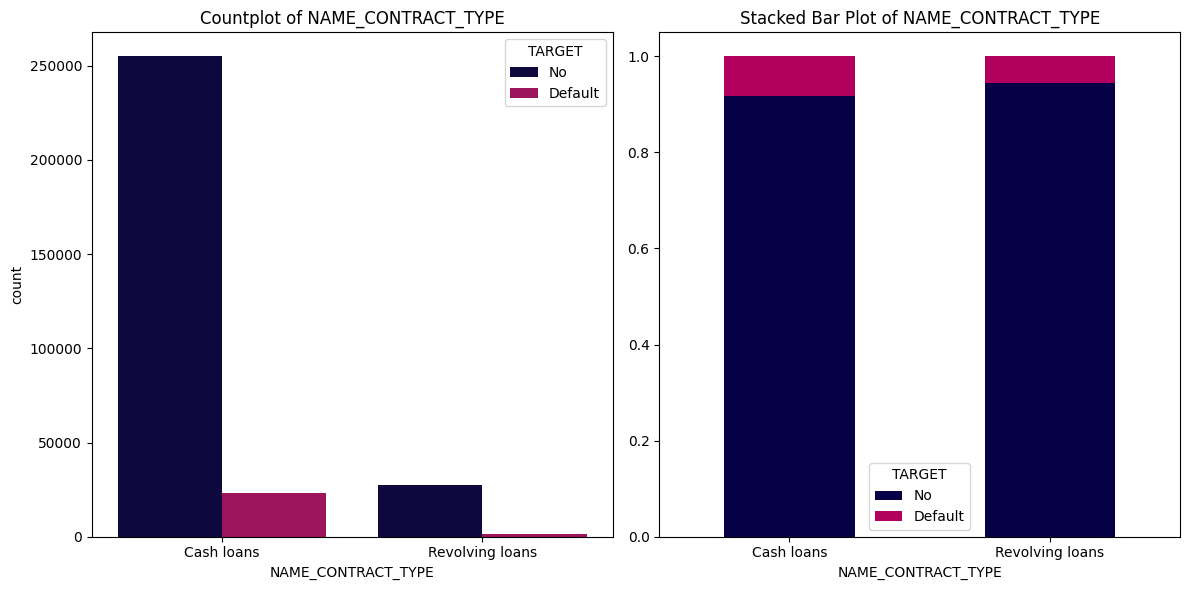

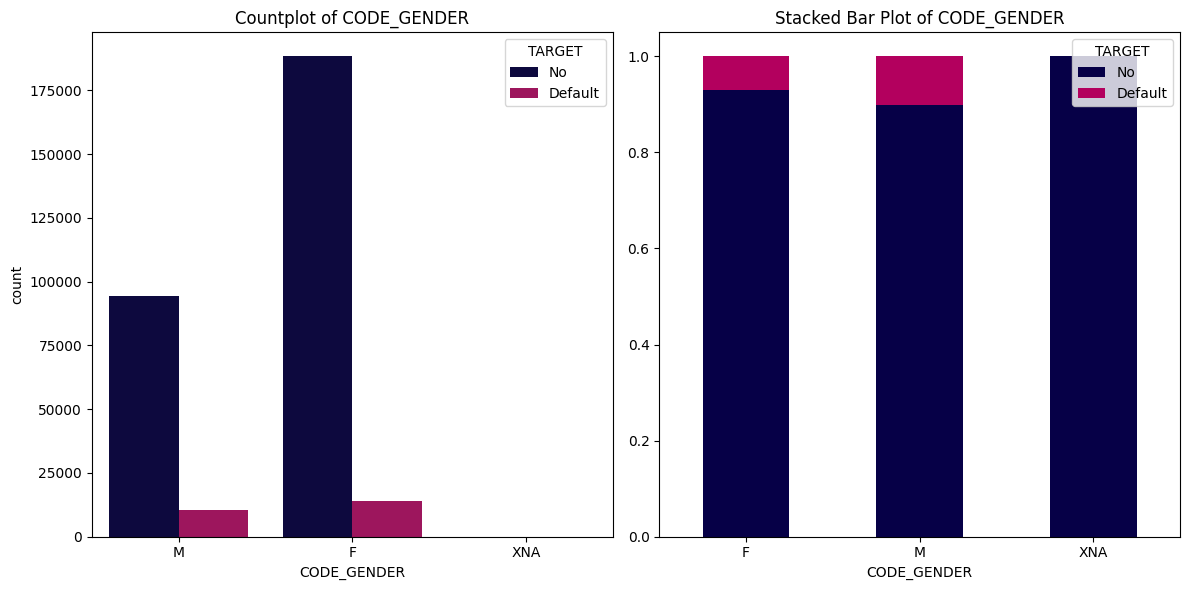

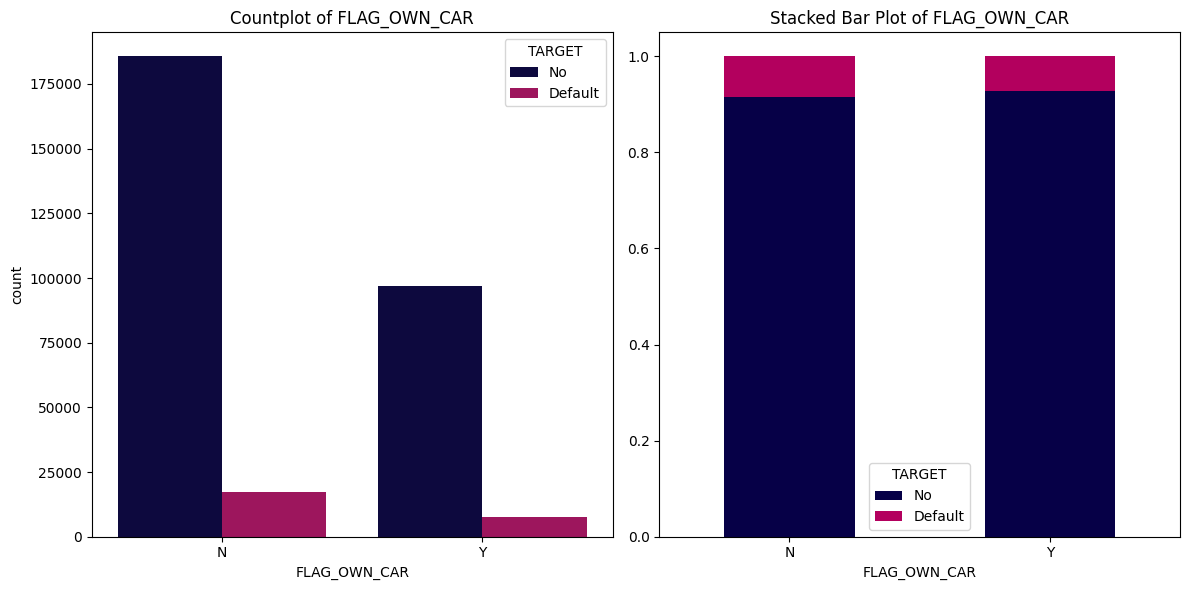

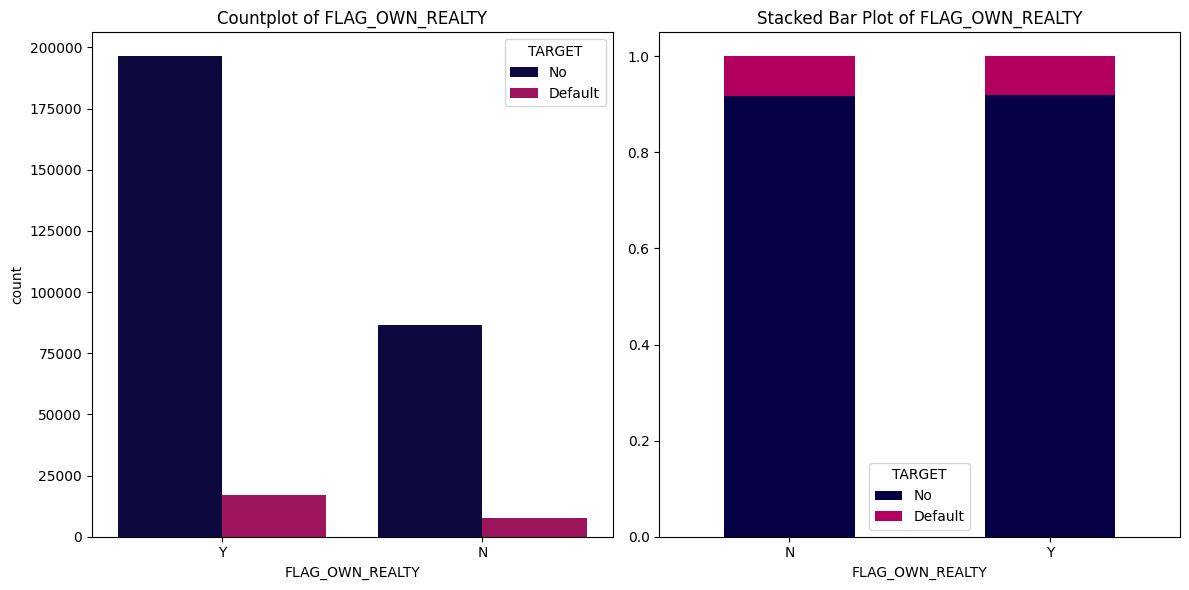

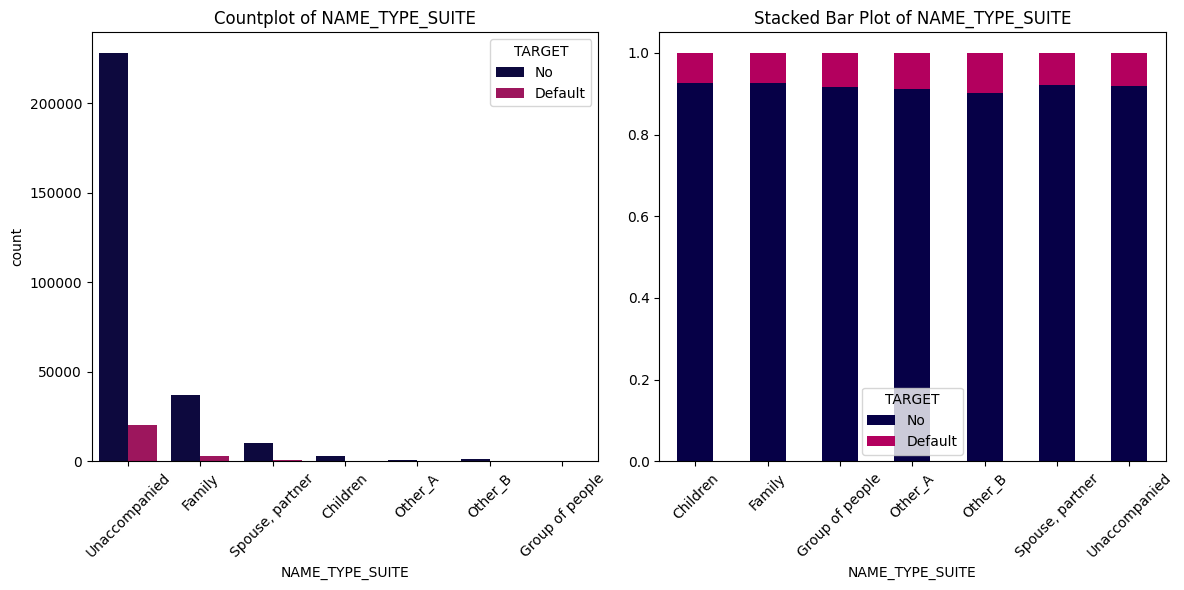

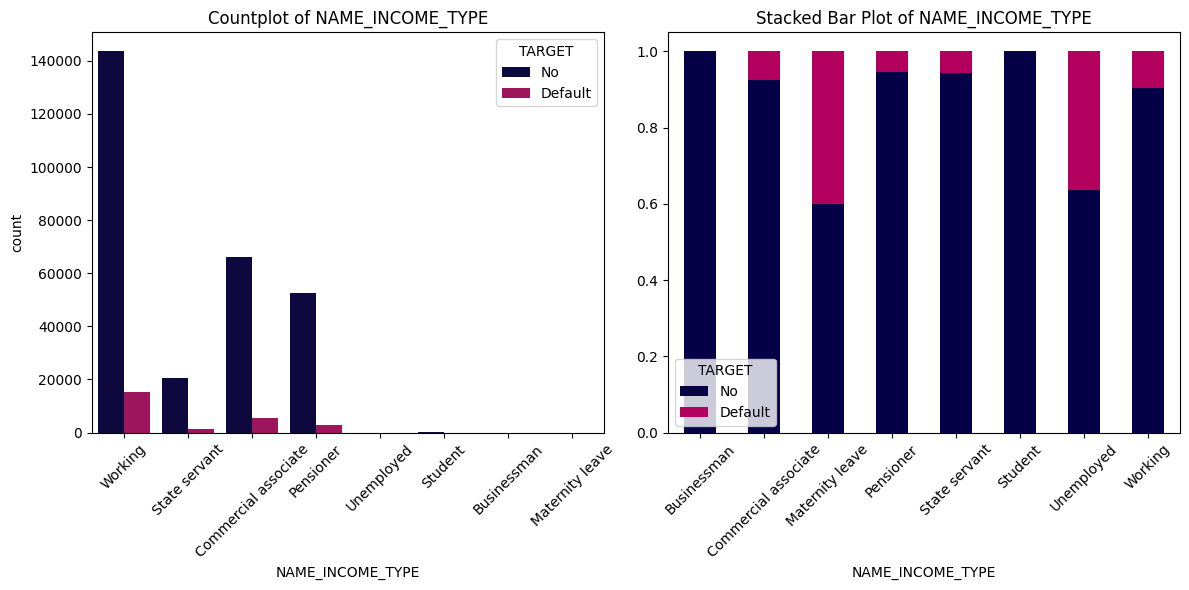

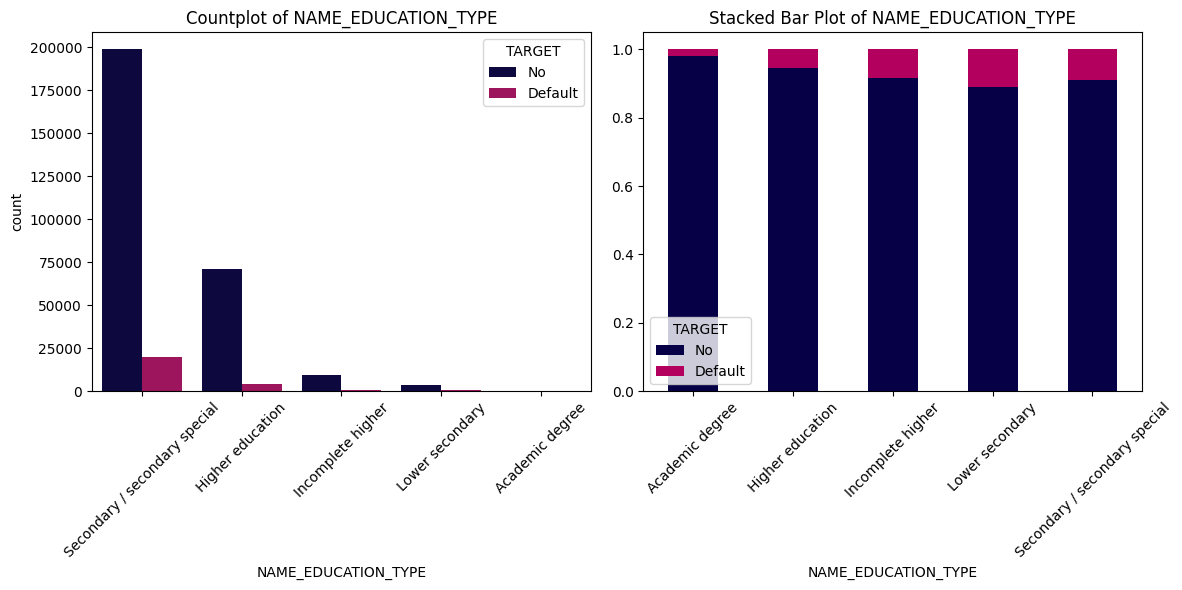

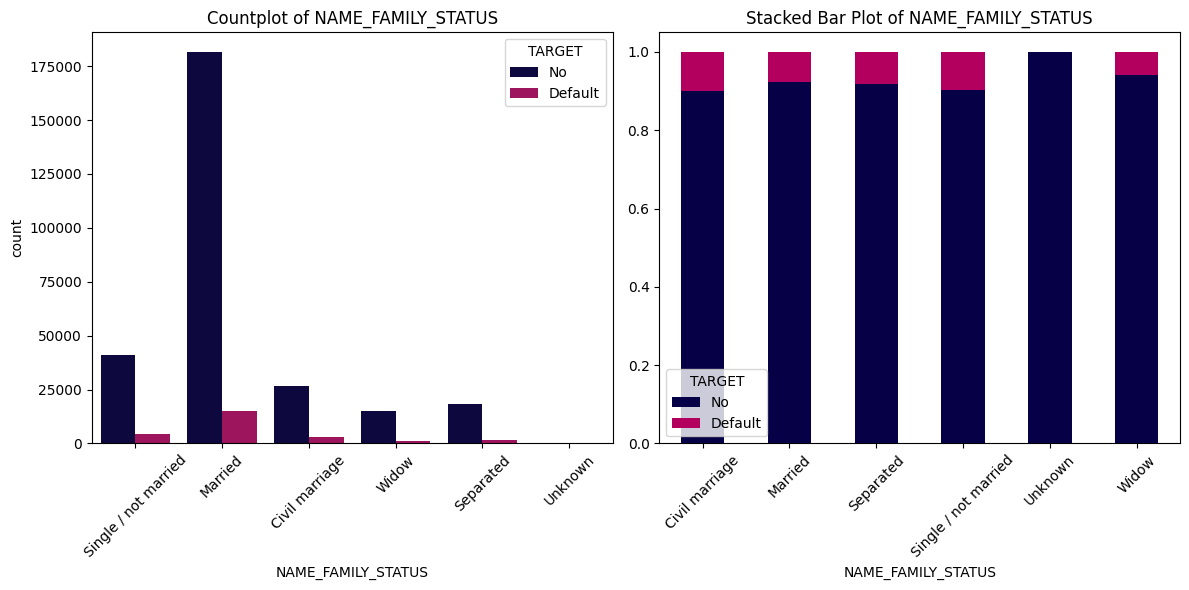

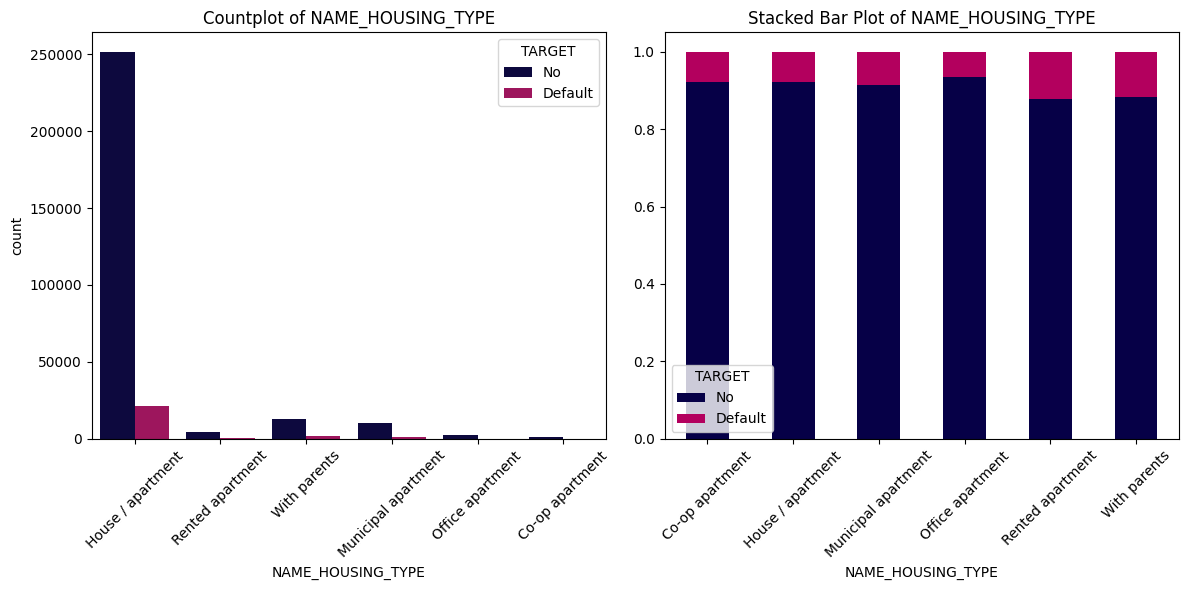

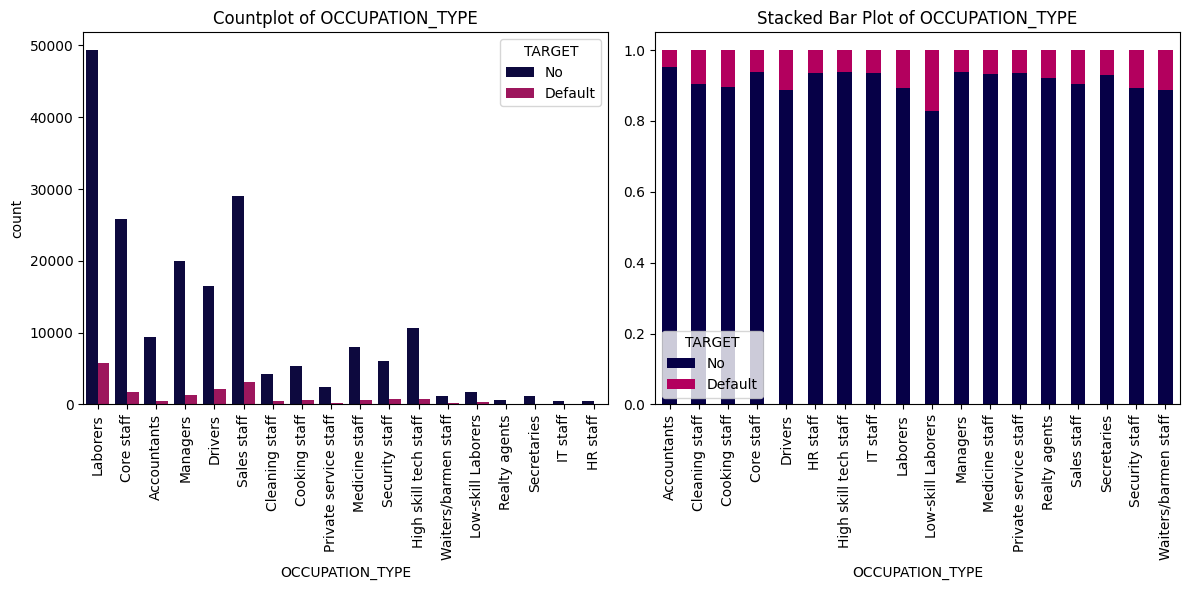

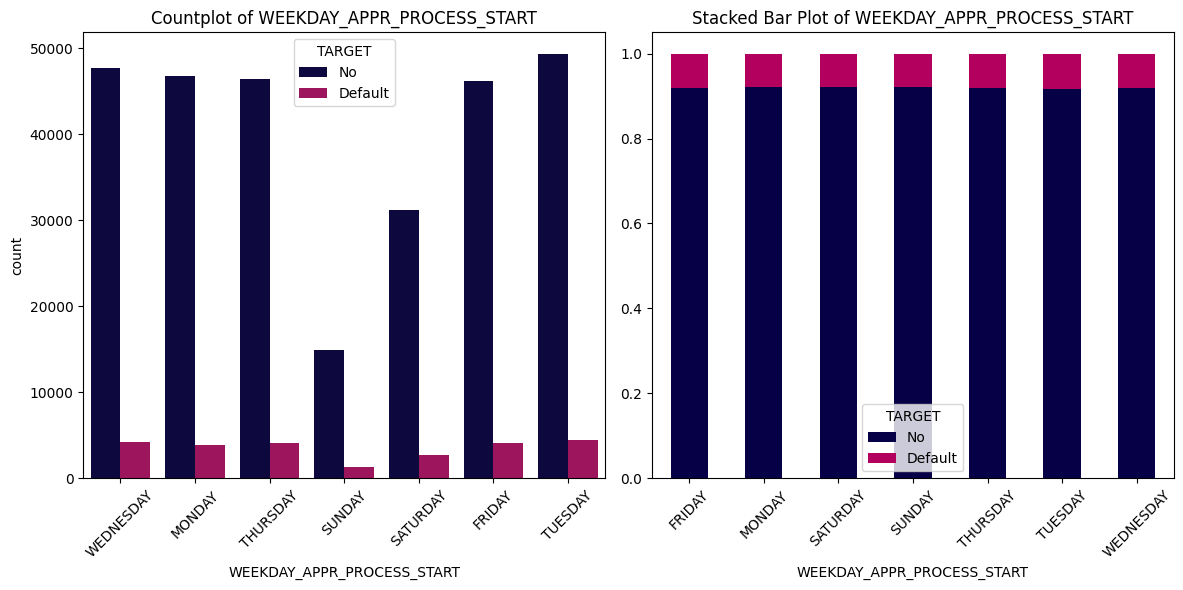

In [34]:
# plot categorical columns
for column in cat_cols:
    if application_train[column].nunique() > 20:
        continue
    elif application_train[column].nunique() > 10:
        show_plots(application_train, column, 90)
    elif application_train[column].nunique() <= 3:
        show_plots(application_train, column, 0)
    else:
        show_plots(application_train, column, 45)

Berdasarkan hasil visualisasi terkait data kategorikal yang ada pada dataset di atas, maka dapat diketahui:
1. Debitur lebih memilih untuk melakukan pinjaman dalam bentuk tunai.
2. Debitur yang melakukan pinjaman didominasi oleh status menikah
3. Debitur mendominasi untuk melakukan kredit untuk rumah dengan tipe apartemen.
4. Debitur didominasi dengan tingkat pendidikan menegah dan bekerja
5. Debitur dengan tipe pekerjaan low-skill laborer memiliki resiko default lebih tinggi.

### Kolom Numerik

In [35]:
num_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
            'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
            'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
            'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
            'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
            'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [36]:
# check skewness of numerical columns
skewness = application_train[num_cols].skew()
skewness_df = pd.DataFrame({'Skewness': skewness})
pd.set_option('display.max_rows', None)
display(skewness_df)
pd.set_option('display.max_rows', 20)

,Skewness
CNT_CHILDREN,1.974604
AMT_INCOME_TOTAL,391.559654
AMT_CREDIT,1.234778
AMT_ANNUITY,1.579777
AMT_GOODS_PRICE,1.349000
REGION_POPULATION_RELATIVE,1.488009
DAYS_BIRTH,-0.115673
DAYS_EMPLOYED,1.664346
DAYS_REGISTRATION,-0.590872
DAYS_ID_PUBLISH,0.349327


Data numerik di dalam dataset di dominasi dengan data yang skewed. Kita dapat memisahkan jenis distribusi berdasarkan nilai skewness dimana nilai skewness antara -0.5 sampai 0.5 terbilang distribusi normal, dan diluar nilai itu terdistribusi skewed.

#### Usia Customer

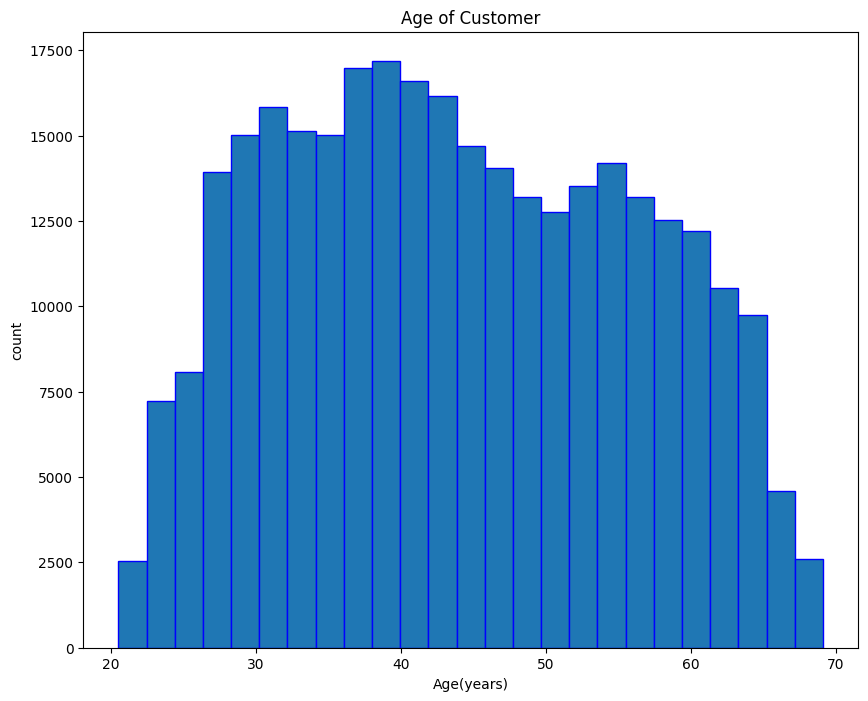

In [37]:
plt.figure(figsize=(10, 8))

plt.hist(application_train['DAYS_BIRTH'] / -365, edgecolor = 'b', bins = 25)
plt.title('Age of Customer')
plt.xlabel('Age(years)')
plt.ylabel('count')

plt.show()

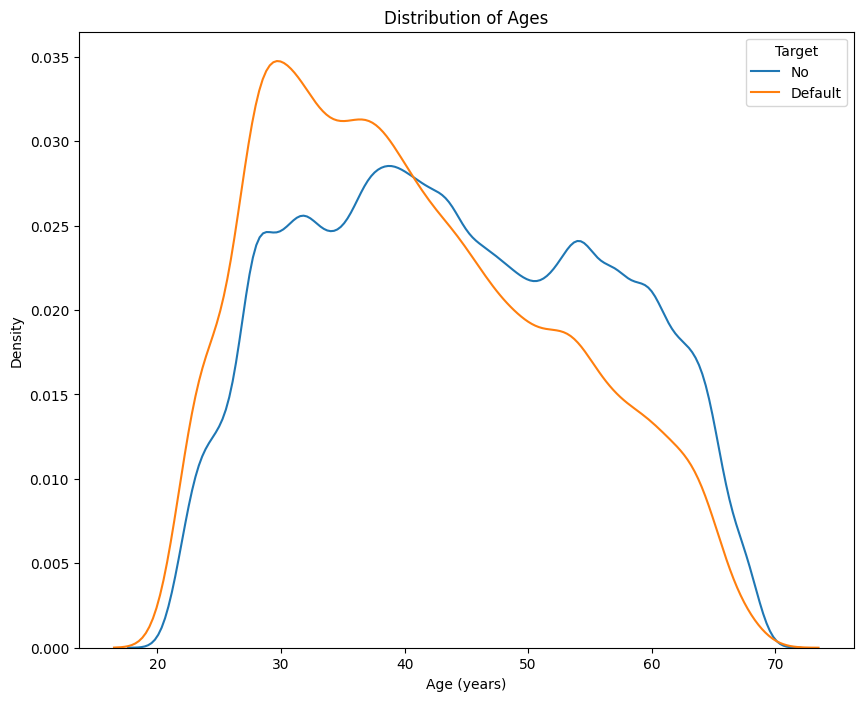

In [38]:
plt.figure(figsize=(10, 8))

sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label='No')
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label='Default')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

plt.legend(title='Target')
plt.show()

Debitur dengan usia antara 20 - 40 tahun memiliki tingkat kemungkinan untuk default lebih tinggi, dan usia debitur didominasi dengan usia produktif yaitu usia 25 - 45 tahun

#### Income Range Debitur

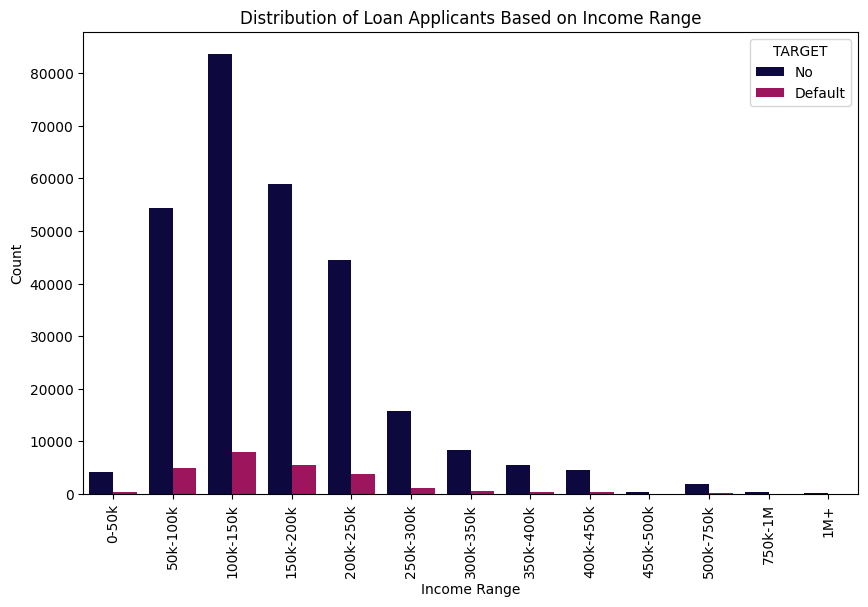

In [39]:
color_palette = {0: '#060047', 1: '#B3005E'}
# Define the income range bins
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-750k', '750k-1M', '1M+']

# Create a new column 'INCOME_RANGE' by cutting the AMT_INCOME_TOTAL variable into bins
application_train['INCOME_RANGE'] = pd.cut(application_train['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='INCOME_RANGE', hue='TARGET', data=application_train, palette=color_palette)
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Range')
plt.xticks(rotation=90)

# Change legend labels
plt.legend(title='TARGET', labels=['No', 'Default'])
plt.show()

Berdasarkan visualisasi diatas dapat diketahui bahwa debitur yang mendominasi adalah debitur dengan penghasil yang berada pada rentan 50.000 hingga 250.000. Debitur dengan kelas penghasilan tersebut merupakan data yang mendominasi jauh dibandingkan dengan kelas penghasilan lainnya. 

#### Credit Range Debitur

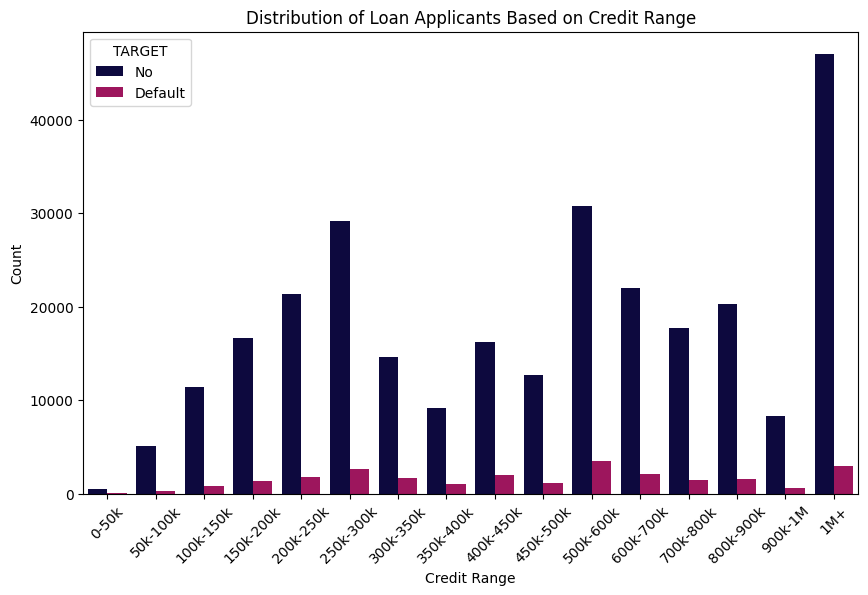

In [40]:
color_palette = {0: '#060047', 1: '#B3005E'}
# Define the credit range bins
credit_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']

# Create a new column 'CREDIT_RANGE' by cutting the AMT_CREDIT variable into bins
application_train['CREDIT_RANGE'] = pd.cut(application_train['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_RANGE', hue='TARGET', data=application_train, palette=color_palette)
ax.set_xlabel('Credit Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Credit Range')
plt.xticks(rotation=45)

# Change legend labels
plt.legend(title='TARGET', labels=['No', 'Default'])
plt.show()

Berdasarkan visualiasi diatas, maka dapat diketahui bahwa mayoritas debitur mengambil pinjaman dalam rentang 200-250k, 450-500k dan 1M+. Hal tersebut dapat menunjukkan preferensi debitur dalam memilih jumlah kredit yang akan diambil.

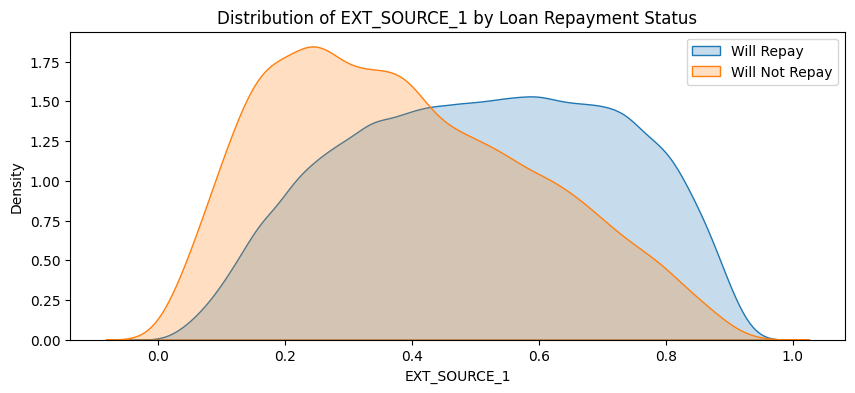

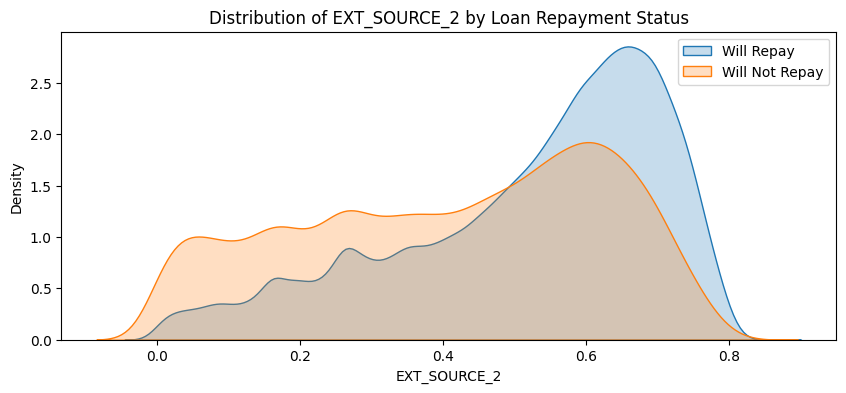

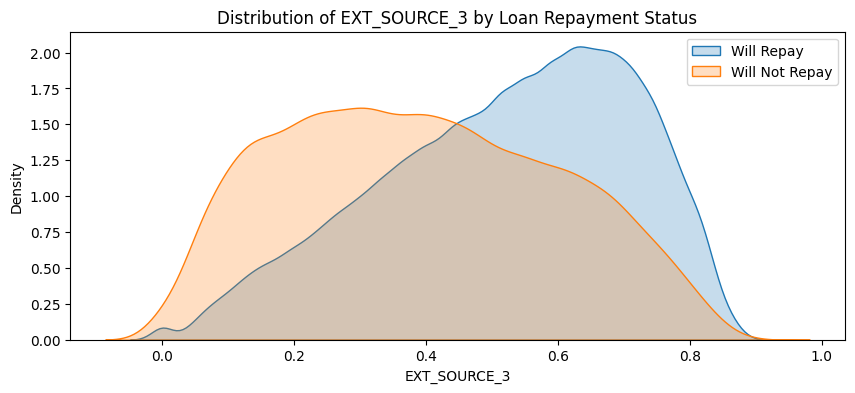

In [41]:
# create a list of EXT_SOURCE columns
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# create a kdeplot for each EXT_SOURCE column
for source in ext_sources:
    capable_ext_source = application_train[application_train['TARGET']==0][source]
    not_capable_ext_source = application_train[application_train['TARGET']==1][source]
    plt.figure(figsize=(10, 4))
    sns.kdeplot(capable_ext_source,label="Will Repay", color='#1f77b4', fill=True)
    sns.kdeplot(not_capable_ext_source,label="Will Not Repay", color='#ff7f0e', fill=True)
    plt.legend()
    plt.title('Distribution of {} by Loan Repayment Status'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')
    plt.show()

Berdasarkan grafik mengenai 3 EXT_SOURCE diatas, maka dapat diketahui bahwa nilai EXT_SOURCE dan default memiliki korelasi negatif, dimana semakin tinggi nilai EXT_SOURCE maka semakin rendah debitur yang mengalami default. Maka dapat di indikasikan bahwa EXT_SOURCE dapat menjadi salah satu prediktor yang baik untuk prediksi resiko kredit.

### Occupation Type

In [43]:
ot = application_train.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
ot.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ot = list(ot['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = ot[ot['OCCUPATION_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ot['percentage'] = percentage
ot

,TARGET,OCCUPATION_TYPE,Customers,percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
...,...,...,...,...
33,1,Secretaries,92,0.07
16,0,Security staff,5999,0.89
34,1,Security staff,722,0.11
17,0,Waiters/barmen staff,1196,0.89


From the table above, we can see HR staff, IT staff and Realty agents have a high percentage of accepted loan applications (92% - 94%) but the number of customers with these jobs who apply for loans is less than a thousand customers, so it is recommended that we create campaigns for these three jobs

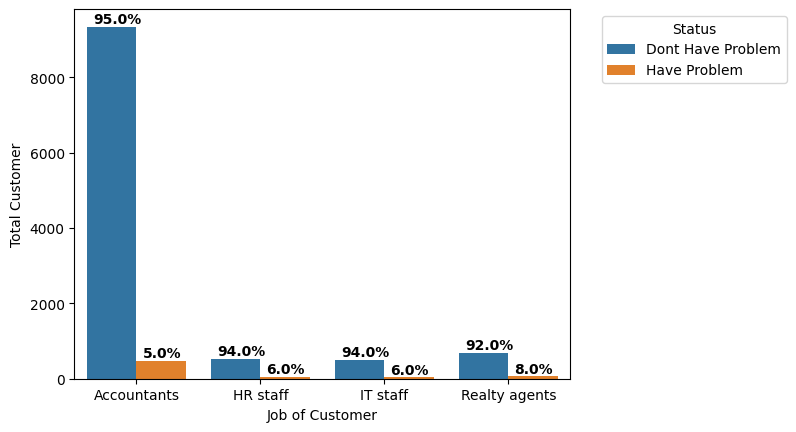

In [46]:
ot_2 = ot[ot['OCCUPATION_TYPE'].isin(['HR staff', 'IT staff', 'Realty agents', 'Accountants'])]
ot_2 = ot_2.reset_index()
ot_2.drop(columns = 'index', inplace=True)

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

ot_2['TARGET'] = ot_2['TARGET'].map(mapping_target)


ax = sns.barplot(x = 'OCCUPATION_TYPE', y= 'Customers', hue= 'TARGET', data = ot_2)
plt.xlabel('Job of Customer')
plt.ylabel('Total Customer')
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(ot_2['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v + 100, s= str(ot_2['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 100, s= str(ot_2['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

# v. Feature Engineering

In [ ]:
df1 = application_train_merged.copy()

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = df1.select_dtypes(include=np.number).columns.tolist()
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPL

## 5.1 Splitting between X and Y

Akan dilakukan pembagian dataset ke dalam training (X) dan data test (y)

In [ ]:
# Defining X and y
X = df1.drop(['TARGET'],axis=1)
y = pd.DataFrame(df1['TARGET'])

In [ ]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69, stratify = y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (246008, 212)
Test Size  :  (61503, 212)


## 5.2 Handling Missing Values

In [ ]:
total = X_train.isnull().sum().sort_values(ascending = False)
percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending = False)
missing_X_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_X_train_data

,Total,Percent
RATE_INTEREST_PRIVILEGED,244682,99.460993
RATE_INTEREST_PRIMARY,244682,99.460993
AMT_PAYMENT_CURRENT,201431,81.879858
AMT_DRAWINGS_ATM_CURRENT,199816,81.223375
AMT_DRAWINGS_OTHER_CURRENT,199816,81.223375
...,...,...
ORGANIZATION_TYPE,0,0.000000
LIVE_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000


Dikarenakan banyak kolom yang memiliki missing value sangat tinggi, maka diputuskan akan menghilangkan kolom dengan missing value yang memiliki persentase diatas 45%. Karena dengan jumlah persentase missing value diatas 45% apabila dilakukan imputasi, dikhawatirkan akan meningkatkan bias pada data.

In [ ]:
# Mengidentifikasi kolom-kolom dengan persentase missing value di atas 45%
columns_to_drop = missing_X_train_data[missing_X_train_data['Percent'] > 45].index

# Menghapus kolom-kolom tersebut dari DataFrame X_train
X_train = X_train.drop(columns_to_drop, axis=1)

In [ ]:
total = X_train.isnull().sum().sort_values(ascending = False)
percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending = False)
missing_X_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_X_train_data.head(20)

,Total,Percent
DAYS_ENDDATE_FACT,103162,41.934409
RATE_DOWN_PAYMENT,102988,41.863679
AMT_DOWN_PAYMENT,102988,41.863679
AMT_CREDIT_SUM_LIMIT,89558,36.404507
OCCUPATION_TYPE,77165,31.366866
DAYS_TERMINATION,74443,30.260398
NFLAG_INSURED_ON_APPROVAL,74443,30.260398
DAYS_FIRST_DUE,74443,30.260398
DAYS_FIRST_DRAWING,74443,30.260398
DAYS_LAST_DUE,74443,30.260398


### Imputasi Missing Values

In [ ]:
# Imputasi missing values dengan median pada data numerikal
# Imputasi missing values dengan modus pada data kategorikal

category_columns = X_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in X_train:
    if X_train[column].isnull().any():
        if(column in category_columns):
            X_train[column]=X_train[column].fillna(X_train[column].mode()[0])
        else:
            X_train[column]=X_train[column].fillna(X_train[column].median())

In [ ]:
# Menghitung jumlah total baris dengan nilai yang hilang
missing_rows = X_train.isnull().any(axis=1).sum()

# Menghitung persentase total baris yang memiliki nilai yang hilang
missing_percentage = (missing_rows / X_train.shape[0]) * 100

print("Persentase total baris dengan nilai yang hilang: {:.2f}%".format(missing_percentage))

Persentase total baris dengan nilai yang hilang: 0.00%


Sudah tidak terdapat lagi missing values pada dataset yang digunakan.

## 5.3 Feature Selection

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include=['object'])

In [ ]:
X_train_cat.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE_prev,WEEKDAY_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_prev,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
161321,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Core staff,SUNDAY,Kindergarten,Active,Consumer loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,New,Clothing and Accessories,POS,XNA,Stone,Clothing,low_normal,POS industry with interest,Active,currency 1,Credit card
229430,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,MONDAY,Trade: type 7,Active,Consumer loans,SUNDAY,Y,XAP,Refused,Cash through the bank,LIMIT,Repeater,Computers,POS,XNA,Stone,Consumer electronics,middle,POS household with interest,Active,currency 1,Credit card
74168,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,High skill tech staff,WEDNESDAY,Business Entity Type 3,Active,Cash loans,SATURDAY,Y,XNA,Refused,XNA,SCOFR,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA,Cash,Closed,currency 1,Consumer credit
244221,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 2,Active,Consumer loans,MONDAY,Y,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,high,POS mobile with interest,Closed,currency 1,Consumer credit
53353,Cash loans,F,N,Y,Family,Pensioner,Secondary / secondary special,Separated,House / apartment,Laborers,TUESDAY,XNA,Active,Cash loans,TUESDAY,Y,XNA,Refused,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Stone,Consumer electronics,middle,Cash X-Sell: middle,Closed,currency 1,Consumer credit


In [ ]:
# Using LabelEncoder to convert categorical into numerical data
X_train_features = X_train.copy()
m_LabelEncoder = LabelEncoder()

# Identify categorical columns
X_train_cat = X_train_features.dtypes == object

for col in X_train_features.columns[X_train_cat]:
    X_train_features[col] = m_LabelEncoder.fit_transform(X_train_features[col])

In [ ]:
# Feature Selection 
selector = SelectKBest(score_func=f_classif, k=10)
selector = selector.fit(X_train_features, y_train)

df_scores = pd.DataFrame({'Feature': X_train_features.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
39,EXT_SOURCE_2,6670.158647,0.0000
40,EXT_SOURCE_3,6186.693652,0.0000
16,DAYS_BIRTH,1568.046648,0.0000
29,REGION_RATING_CLIENT_W_CITY,905.497882,0.0000
28,REGION_RATING_CLIENT,851.793195,0.0000
...,...,...,...
23,FLAG_CONT_MOBILE,0.035611,0.8503
67,AMT_REQ_CREDIT_BUREAU_DAY,0.001264,0.9716
79,SK_ID_PREV_prev,0.000309,0.9860
49,FLAG_DOCUMENT_5,0.000018,0.9966


30 feature terbaik berdasarkan feature selection diatas akan digunakan di dalam pemodelan.

In [ ]:
# Ambil hanya variabel prediktor yang dipilih
X = X_train_features[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
                                    'REGION_RATING_CLIENT', 'DAYS_CREDIT', 'NAME_EDUCATION_TYPE',
                                    'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'DAYS_ID_PUBLISH',
                                    'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE', 'FLAG_EMP_PHONE',
                                    'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_EMPLOYED',
                                    'NAME_CONTRACT_STATUS_prev', 'DAYS_REGISTRATION', 'CODE_REJECT_REASON',
                                    'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                                    'DAYS_CREDIT_UPDATE', 'NAME_HOUSING_TYPE', 'DAYS_ENDDATE_FACT',
                                    'DEF_30_CNT_SOCIAL_CIRCLE', 'CREDIT_ACTIVE', 'DAYS_ENTRY_PAYMENT',
                                    'LIVE_CITY_NOT_WORK_CITY', 'DAYS_INSTALMENT', 'DAYS_DECISION']]

# Hitung VIF untuk setiap variabel prediktor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                       Variable          VIF
0                  EXT_SOURCE_2     9.850192
1                  EXT_SOURCE_3    10.976520
2                    DAYS_BIRTH    28.765138
3   REGION_RATING_CLIENT_W_CITY   185.660127
4          REGION_RATING_CLIENT   185.950746
..                          ...          ...
26                CREDIT_ACTIVE     5.840117
27           DAYS_ENTRY_PAYMENT  1826.812473
28      LIVE_CITY_NOT_WORK_CITY     6.758677
29              DAYS_INSTALMENT  1800.331453
30                DAYS_DECISION     3.430012

[31 rows x 2 columns]


Berdasarkan nilai VIF yang merupakan penialaian multicolinearity diatas, akan dihilangkan feature dengan nilai VIF yang signifikan. Berikut merupakan feature yang akan di hilangkan 'DAYS_BIRTH'
'REGION_RATING_CLIENT_W_CITY'
'REGION_RATING_CLIENT'
'NAME_REJECT_REASON'
'DAYS_ENDDATE_FACT'
'DAYS_INSTALMENT'

In [ ]:
# Ambil hanya variabel prediktor yang dipilih
X = X_train_features[['EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_CREDIT', 'NAME_EDUCATION_TYPE',
                                    'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'DAYS_ID_PUBLISH',
                                    'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
                                    'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_EMPLOYED',
                                    'NAME_CONTRACT_STATUS_prev', 'DAYS_REGISTRATION',
                                    'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                                    'DAYS_CREDIT_UPDATE', 'NAME_HOUSING_TYPE',
                                    'DEF_30_CNT_SOCIAL_CIRCLE', 'CREDIT_ACTIVE',
                                    'LIVE_CITY_NOT_WORK_CITY', 'DAYS_DECISION']]

# Hitung VIF untuk setiap variabel prediktor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Variable       VIF
0               EXT_SOURCE_2  8.196162
1               EXT_SOURCE_3  9.723143
2                DAYS_CREDIT  6.969722
3        NAME_EDUCATION_TYPE  6.719407
4     DAYS_LAST_PHONE_CHANGE  2.686787
..                       ...       ...
18         NAME_HOUSING_TYPE  2.745217
19  DEF_30_CNT_SOCIAL_CIRCLE  1.103504
20             CREDIT_ACTIVE  4.542854
21   LIVE_CITY_NOT_WORK_CITY  6.750316
22             DAYS_DECISION  2.672422

[23 rows x 2 columns]


Tidak terdapat lagi multicolinearity pada feature yang dipilih dalam pemodelan. Untuk batas nilai VIF yang digunakan adalah 10, sehingga tidak terdapat feature dengan nilai VIF diatas 10 dan semua feature terpilih di atas akan digunakan dalam pemodelan.

In [ ]:
# Feature terpilih

Features = ['EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_CREDIT', 'NAME_EDUCATION_TYPE',
                                    'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'DAYS_ID_PUBLISH',
                                    'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
                                    'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_EMPLOYED',
                                    'NAME_CONTRACT_STATUS_prev', 'DAYS_REGISTRATION',
                                    'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                                    'DAYS_CREDIT_UPDATE', 'NAME_HOUSING_TYPE',
                                    'DEF_30_CNT_SOCIAL_CIRCLE', 'CREDIT_ACTIVE',
                                    'LIVE_CITY_NOT_WORK_CITY', 'DAYS_DECISION']
X_train_final = X_train[Features]
X_test_final = X_test[Features]

X_train_final.head(5)

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_CREDIT,NAME_EDUCATION_TYPE,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_EMPLOYED,NAME_CONTRACT_STATUS_prev,DAYS_REGISTRATION,NAME_YIELD_GROUP,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_CREDIT_UPDATE,NAME_HOUSING_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,CREDIT_ACTIVE,LIVE_CITY_NOT_WORK_CITY,DAYS_DECISION
161321,0.303627,0.612704,-54.0,Secondary / secondary special,-279.0,F,-4738,0,Working,0,1,-591,Approved,-1977.0,low_normal,450000.0,0.009657,-48.0,House / apartment,0.0,Active,0,-279.0
229430,0.696547,0.000527,-368.0,Secondary / secondary special,-628.0,F,-2834,1,Working,0,1,-1475,Refused,-875.0,middle,130500.0,0.030755,-31.0,House / apartment,0.0,Active,1,-540.0
74168,0.338053,0.535276,-474.0,Secondary / secondary special,-435.0,F,-764,0,Working,0,1,-546,Refused,-3312.0,XNA,387000.0,0.022625,-285.0,House / apartment,0.0,Closed,0,-144.0
244221,0.714667,0.329655,-599.0,Secondary / secondary special,-392.0,M,-1656,0,Working,0,1,-307,Approved,-8962.0,high,765000.0,0.072508,-365.0,House / apartment,0.0,Closed,0,-116.0
53353,0.647373,0.644679,-2332.0,Secondary / secondary special,-273.0,F,-4579,0,Pensioner,0,1,365243,Refused,-3574.0,middle,675000.0,0.003069,-2001.0,House / apartment,0.0,Closed,0,-273.0


In [ ]:
X_train_final.shape

(246008, 23)

In [ ]:
X_test_final.shape

(61503, 23)

## 5.4 Undersampling Data Train

Undersampling data train digunakan untuk mengatasi imbalance yang ada pada data terkait dengan data target yang ada.

In [ ]:
# Create an instance of RandomUnderSampler with the desired sampling strategy
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_train_final, y_train = undersampler.fit_resample(X_train_final, y_train)

In [ ]:
# Convert y_train to a pandas Series (if it's not already)
y_train_series = y_train['TARGET']
# Calculate the category counts
category_counts = y_train_series.value_counts()

# Display the category counts
print(category_counts)


TARGET
0    19860
1    19860
Name: count, dtype: int64


In [ ]:
X_train_final.shape

(39720, 23)

In [ ]:
X_test_final.shape

(61503, 23)

## 5.5 Pipeline

### Preprocess Pipeline

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_final.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_final.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_CREDIT_UPDATE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'DAYS_DECISION']
Categorical Columns :  ['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS_prev', 'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE', 'CREDIT_ACTIVE']


In [ ]:
# Handle missing values
X_train_final[num_columns] = X_train_final[num_columns].fillna(X_train_final[num_columns].median())
X_test_final[num_columns] = X_test_final[num_columns].fillna(X_train_final[num_columns].median())

X_train_final[cat_columns] = X_train_final[cat_columns].fillna('Unknown')
X_test_final[cat_columns] = X_test_final[cat_columns].fillna('Unknown')

In [ ]:
# Create pipelines
num_pipeline = make_pipeline(RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))

final_pipeline = ColumnTransformer([
    ('num_transformer', num_pipeline, num_columns),
    ('cat_transformer', cat_pipeline, cat_columns)
])


In [ ]:
# Fit and transform
X_train_final = final_pipeline.fit_transform(X_train_final)
X_test_final = final_pipeline.transform(X_test_final)

In [ ]:
X_train_final.shape

(39720, 51)

In [ ]:
X_train_final

array([[ 0.53017914,  0.13145587,  0.83548067, ...,  0.        ,
         1.        ,  0.        ],
       [-0.75959677,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.07390312, -0.01470084, -0.57581764, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.1886638 , -0.95052945,  0.88107037, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99193561, -0.38262148,  1.02576809, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22101391,  0.84723966,  0.48166501, ...,  0.        ,
         1.        ,  0.        ]])

# vi. Model Definition

In [ ]:
# Define Logistic regression
svm = SVC()
# Define XGB Classifier
xgb = XGBClassifier()
# Define LGBM classifier
lgbm = LGBMClassifier()

# vii. Model Training

## 7.1 Cross Validation

In [ ]:
#Training Dengan Cross Validation
#svm
score_svm = cross_val_score(svm, X_train_final, y_train, cv=3, scoring='roc_auc')

In [ ]:
#Training Dengan Cross Validation
#XGB Classifier
score_xgb = cross_val_score(xgb, X_train_final, y_train, cv=3, scoring='roc_auc')
#LGBM classifier
score_lgbm = cross_val_score(lgbm, X_train_final, y_train, cv=3, scoring='roc_auc')

In [ ]:
#SVM score
print('SVM')
print('ROC AUC Score - Mean - Cross Validation: ', round(score_svm.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(score_svm.std(),3))

SVM
ROC AUC Score - Mean - Cross Validation:  0.716
ROC AUC Score - Std - Cross Validation:  0.004


In [ ]:
#XGB Classifier
print('XGB Classifier')
print('ROC AUC Score - Mean - Cross Validation: ', round(score_xgb.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(score_xgb.std(),3))

XGB Classifier
ROC AUC Score - Mean - Cross Validation:  0.727
ROC AUC Score - Std - Cross Validation:  0.004


In [ ]:
#LGBM classifier
print('LGBM classifier')
print('ROC AUC Score - Mean - Cross Validation: ', round(score_lgbm.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(score_lgbm.std(),3))

LGBM classifier
ROC AUC Score - Mean - Cross Validation:  0.74
ROC AUC Score - Std - Cross Validation:  0.004


## 7.2 Hyperparameter Tuning

### Hyperparameter Tuning XGB

In [ ]:
# Define the range of hyperparameters for random search
param_xgb = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': [0, 1, 5],
    'n_estimators': range(50, 300, 50)
}

In [ ]:
# Create the random search object
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_xgb,
    n_iter=10,
    refit=True,
    scoring='roc_auc',
    return_train_score=True,
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)
# Fit the random search on the training data
random_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(1, 6),
                                        'n_estimators': range(50, 300, 50),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [ ]:
# Menampilkan hasi perhitungan random_search
dt_hyperparam_df = pd.DataFrame(random_search.cv_results_)
dt_hyperparam_df.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']]

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
6,"{'subsample': 0.9, 'n_estimators': 150, 'min_c...",0.742898,0.765558,0.003694,0.001414,1,0.042802
4,"{'subsample': 1.0, 'n_estimators': 250, 'min_c...",0.742702,0.777816,0.003872,0.001117,2,0.047805
5,"{'subsample': 0.5, 'n_estimators': 200, 'min_c...",0.742642,0.772469,0.003890,0.001431,3,0.043803
0,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",0.742640,0.777586,0.004668,0.001221,4,0.040004
9,"{'subsample': 0.5, 'n_estimators': 200, 'min_c...",0.742154,0.797500,0.004068,0.001172,5,0.058002
7,"{'subsample': 0.8, 'n_estimators': 250, 'min_c...",0.739367,0.829194,0.003946,0.001254,6,0.188805
2,"{'subsample': 0.9, 'n_estimators': 200, 'min_c...",0.733916,0.922125,0.003984,0.002240,7,0.095208
8,"{'subsample': 0.7, 'n_estimators': 250, 'min_c...",0.733262,0.745408,0.003822,0.001087,8,0.057602
1,"{'subsample': 1.0, 'n_estimators': 150, 'min_c...",0.721729,0.993704,0.003713,0.000678,9,0.114009
3,"{'subsample': 0.7, 'n_estimators': 150, 'min_c...",0.720458,0.967874,0.002372,0.001109,10,0.091607


In [ ]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.052222222222222225, 'gamma': 5, 'colsample_bytree': 0.6}
Best Score: 0.7428976780058597


### Hyperparameter Tuning LGBM

In [ ]:
# Value of hyperparameters for random search

param_lgb = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
             'num_leaves':range(10,100,10),
             'min_child_samples':range(500,1000,100),
             'reg_alpha':[0.1,0.01,0.2,0.3],
             'reg_lambda':[0.1,0.01,0.2,0.3],
             'n_estimators':range(50,300,50),
             'max_bin': range(500,1500,100)}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_lgb,
    n_iter=10,  # Number of parameter settings that are sampled
    refit=True,
    scoring='roc_auc',  # Evaluation metric for scoring the models
    return_train_score=True,
    cv=5,  # Number of cross-validation folds
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Fit the random search on the training data
random_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.1, 0.01, 0.05,
                                                          0.001],
                                        'max_bin': range(500, 1500, 100),
                                        'min_child_samples': range(500, 1000, 100),
                                        'n_estimators': range(50, 300, 50),
                                        'num_leaves': range(10, 100, 10),
                                        'reg_alpha': [0.1, 0.01, 0.2, 0.3],
                                        'reg_lambda': [0.1, 0.01, 0.2, 0.3]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [ ]:
# Menampilkan hasi perhitungan random_search
dt_hyperparam_df = pd.DataFrame(random_search.cv_results_)
dt_hyperparam_df.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']]

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
4,"{'reg_lambda': 0.3, 'reg_alpha': 0.01, 'num_le...",0.743531,0.792734,0.004991,0.001216,1,0.173604
6,"{'reg_lambda': 0.2, 'reg_alpha': 0.01, 'num_le...",0.743266,0.780632,0.004996,0.001512,2,0.095205
7,"{'reg_lambda': 0.01, 'reg_alpha': 0.2, 'num_le...",0.742314,0.817689,0.005278,0.001193,3,0.245008
0,"{'reg_lambda': 0.2, 'reg_alpha': 0.01, 'num_le...",0.741839,0.766482,0.004411,0.001539,4,0.087602
2,"{'reg_lambda': 0.1, 'reg_alpha': 0.3, 'num_lea...",0.741374,0.763250,0.004538,0.001293,5,0.086804
5,"{'reg_lambda': 0.1, 'reg_alpha': 0.3, 'num_lea...",0.735932,0.753407,0.003773,0.001443,6,0.052802
9,"{'reg_lambda': 0.2, 'reg_alpha': 0.2, 'num_lea...",0.731152,0.747879,0.003764,0.001249,7,0.090003
1,"{'reg_lambda': 0.3, 'reg_alpha': 0.1, 'num_lea...",0.718187,0.726369,0.003195,0.001581,8,0.133204
8,"{'reg_lambda': 0.2, 'reg_alpha': 0.2, 'num_lea...",0.717320,0.725587,0.003068,0.001938,9,0.102203
3,"{'reg_lambda': 0.2, 'reg_alpha': 0.3, 'num_lea...",0.712715,0.717387,0.004157,0.001217,10,0.035201


In [ ]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'reg_lambda': 0.3, 'reg_alpha': 0.01, 'num_leaves': 50, 'n_estimators': 150, 'min_child_samples': 600, 'max_bin': 800, 'learning_rate': 0.05}
Best Score: 0.7435313305931043


# viii. Model Evalauation

## 8.1 XGB

In [ ]:
best_xgb = XGBClassifier(subsample=0.9,
                              n_estimators=150,
                              min_child_weight=5,
                              max_depth=4,
                              learning_rate=0.052222222222222225,
                              gamma=5,
                              colsample_bytree=0.6)

In [ ]:
# Fit the LGBMClassifier model
best_xgb.fit(X_train_final, y_train)

# Predict probabilities for the test data
xgb_train_proba = best_xgb.predict_proba(X_train_final)[:, 1]
xgb_test_proba = best_xgb.predict_proba(X_test_final)[:, 1]

# Calculate the ROC AUC score
roc_auc_train = roc_auc_score(y_train, xgb_train_proba)
roc_auc_test = roc_auc_score(y_test, xgb_test_proba)
print("ROC AUC Score Train:", roc_auc_train)
print("ROC AUC Score Test:", roc_auc_test)

ROC AUC Score Train: 0.7623354544246788
ROC AUC Score Test: 0.735931783548193


In [ ]:
lgbm_train_p = best_xgb.predict(X_train_final)
lgbm_test_p = best_xgb.predict(X_test_final)

print('Training score: {:.4f}'.format(best_xgb.score(X_train_final, y_train)))
print(classification_report(y_train,lgbm_train_p))
print('Test score: {:.4f}'.format(best_xgb.score(X_test_final, y_test)))
print(classification_report(y_test,lgbm_test_p))

Training score: 0.6938
              precision    recall  f1-score   support

           0       0.69      0.70      0.70     19860
           1       0.70      0.69      0.69     19860

    accuracy                           0.69     39720
   macro avg       0.69      0.69      0.69     39720
weighted avg       0.69      0.69      0.69     39720

Test score: 0.6848
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.67      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.68      0.76     61503



<Axes: >

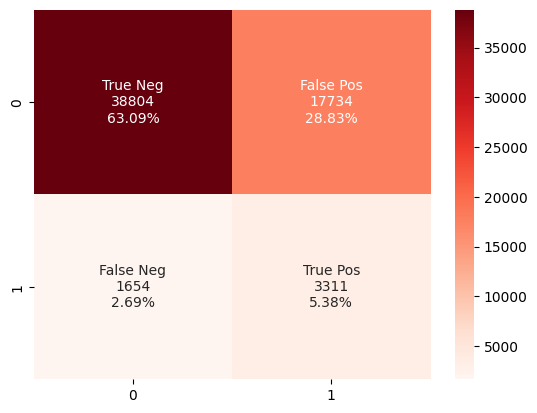

In [ ]:
# Evaluasi dengan confusion matrix
confusion = confusion_matrix(y_test, best_xgb.predict(X_test_final))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Reds',fmt ='')

## 8.2 LGBM

In [ ]:
best_lgbm = LGBMClassifier(reg_lambda= 0.3, reg_alpha= 0.01, num_leaves= 50, 
                           n_estimators= 150, min_child_samples= 600, max_bin= 800, 
                           learning_rate= 0.05)

In [ ]:
# Fit the LGBMClassifier model
best_lgbm.fit(X_train_final, y_train)

# Predict probabilities for the test data
lgbm_train_proba = best_lgbm.predict_proba(X_train_final)[:, 1]
lgbm_test_proba = best_lgbm.predict_proba(X_test_final)[:, 1]

# Calculate the ROC AUC score
roc_auc_train = roc_auc_score(y_train, lgbm_train_proba)
roc_auc_test = roc_auc_score(y_test, lgbm_test_proba)
print("ROC AUC Score Train:", roc_auc_train)
print("ROC AUC Score Test:", roc_auc_test)

ROC AUC Score Train: 0.7936796421881671
ROC AUC Score Test: 0.7354766858760912


In [ ]:
lgbm_train_p = best_lgbm.predict(X_train_final)
lgbm_test_p = best_lgbm.predict(X_test_final)

print('Training score: {:.4f}'.format(best_lgbm.score(X_train_final, y_train)))
print(classification_report(y_train,lgbm_train_p))
print('Test score: {:.4f}'.format(best_lgbm.score(X_test_final, y_test)))
print(classification_report(y_test,lgbm_test_p))

Training score: 0.7194
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     19860
           1       0.72      0.71      0.72     19860

    accuracy                           0.72     39720
   macro avg       0.72      0.72      0.72     39720
weighted avg       0.72      0.72      0.72     39720

Test score: 0.6820
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56538
           1       0.16      0.67      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.68      0.75     61503



<Axes: >

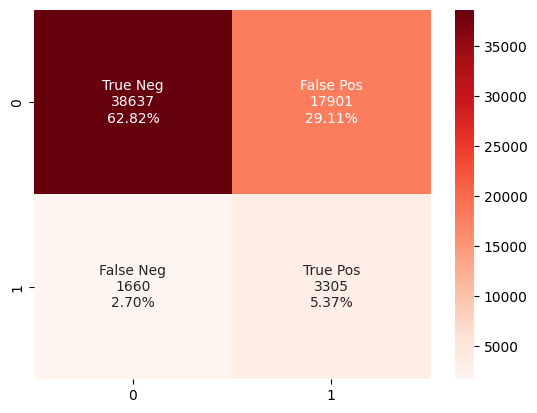

In [ ]:
# Evaluasi dengan confusion matrix
confusion = confusion_matrix(y_test, best_lgbm.predict(X_test_final))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Reds',fmt ='')

# ix. Model Saving

In [ ]:
# Creating data inference
df_inf = application_train.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
0,140209,0,Cash loans,F,N,Y,0,99000.0,328405.5,16897.5,283500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-19979,-5518,-9890.0,-3492,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,NaN,0.413630,0.358951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-2715.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,50k-100k,300k-350k
1,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,"Spouse, partner",Working,Incomplete higher,Married,House / apartment,0.020246,-21774,-2125,-4611.0,-4653,NaN,1,1,1,1,1,0,Security staff,2.0,3,3,FRIDAY,13,0,0,0,0,0,0,Medicine,0.484936,0.182710,0.145543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-2008.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,100k-150k,400k-450k
2,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,Unaccompanied,Working,Incomplete higher,Single / not married,With parents,0.020713,-10151,-2516,-2789.0,-2834,6.0,1,1,0,1,1,1,Drivers,1.0,3,2,MONDAY,7,0,0,0,0,0,0,Transport: type 4,NaN,0.426409,0.081726,0.0701,0.0846,0.9732,0.6328,0.0668,0.00,0.1379,0.1667,0.2083,0.0433,0.0546,0.0512,0.0116,0.0360,0.0714,0.0878,0.9732,0.6472,0.0674,0.0000,0.1379,0.1667,0.2083,0.0443,0.0597,0.0533,0.0117,0.0381,0.0708,0.0846,0.9732,0.6377,0.0672,0.00,0.1379,0.1667,0.2083,0.0441,0.0556,0.0521,0.0116,0.0367,reg oper account,block of flats,0.0846,"Stone, brick",No,3.0,1.0,3.0,1.0,0.0,0,0,0,0,0

In [ ]:
# Saving data inference as .csv file
df_inf.to_csv('Home_Credit_data_Inference.csv')

In [ ]:
Drop_Columns = [
    'RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_PAYMENT_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT',
    'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT',
    'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'AMT_ANNUITY_bureau_main',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_INST_MIN_REGULARITY', 'CNT_INSTALMENT_MATURE_CUM', 'AMT_BALANCE',
    'NAME_CONTRACT_STATUS_credit', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
    'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'CNT_DRAWINGS_CURRENT',
    'SK_ID_PREV_credit', 'AMT_TOTAL_RECEIVABLE', 'SK_DPD_credit', 'MONTHS_BALANCE_credit', 'SK_DPD_DEF_credit',
    'MONTHS_BALANCE_bureau', 'STATUS', 'SK_ID_BUREAU', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
    'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'FLOORSMIN_AVG', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE',
    'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'EXT_SOURCE_1',
    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
    'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
    'NAME_TYPE_SUITE_prev', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_AVG',
    'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE',
    'EMERGENCYSTATE_MODE', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_REJECT_REASON', 'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
    'AMT_ANNUITY_prev', 'AMT_GOODS_PRICE_prev', 'NAME_CLIENT_TYPE', 'CHANNEL_TYPE',
    'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
    'NAME_CASH_LOAN_PURPOSE', 'HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START_prev',
    'WEEKDAY_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START_prev',
    'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_TYPE_prev', 'NAME_SELLER_INDUSTRY',
    'SELLERPLACE_AREA', 'NAME_PRODUCT_TYPE', 'CREDIT_CURRENCY', 'CREDIT_TYPE',
    'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
    'CNT_CREDIT_PROLONG', 'SK_ID_PREV_installments', 'SK_ID_PREV_bureau_main',
    'SK_DPD', 'SK_DPD_DEF'
]

In [ ]:
# Save the Files

#model dan preprocessing
with open('best_xgb.pkl', 'wb') as file_1:
  joblib.dump(best_xgb, file_1)
  
with open('Drop_Columns.txt', 'w') as file_2:
  json.dump(Drop_Columns, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_columns.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)

with open('final_pipeline.pkl', 'wb') as file_5:
  pickle.dump(final_pipeline, file_5)

# x. Model Inference

Model inference dilakukan dalam notebook [model_inference.ipynb]. Model yang digunakan adalah XGB karena memberikan performa terbaik diantara 3 model yang dicoba.

Model dapat melakukan prediksi terhadap data baru.

# xi. Kesimpulan

Berdasarkan analisis dan pemodelan yang telah dilakukan, dapat ditarik beberapa kesimpulan seperti dibawah ini:

1. Analisis EDA
- Variabel target memiliki distribusi yang sangat imbalance dengan variabel kelas 0 yang hanya mempunyai proporsi 8% dari keseluruhan data
- Debitur lebih memilih untuk melakukan pinjaman dalam bentuk tunai.
- Debitur yang melakukan pinjaman didominasi oleh status menikah
- Debitur mendominasi untuk melakukan kredit untuk rumah dengan tipe apartemen.
- Debitur didominasi dengan tingkat pendidikan menegah dan bekerja
- Debitur dengan tipe pekerjaan low-skill laborer memiliki resiko default lebih tinggi.

2. Pemodelan
- Berdasarkan pemodelan yang telah dilakukan maka diputuskan bahwa XGB merupakan pemodelan yang menunjukkan kinerja terbaik diantara 3 model yang diuji untuk memprediksi default payment dari debitur.
- Hasil evaluasi terakhir menunjukkan bahwa model Logistic Regression menghasilkan nilai ROC AUC Score sebesar 0.73 dan recall sebesar 0.68.
- Nilai ROC AUC yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas default dan non-default.
- Nilai recall yang relatif tinggi menunjukkan bahwa model mampu mengidentifikasi sebagian besar kasus default dengan baik.



Berdasarkan hal tersebut maka dapat disimpulkan bahwa XGB merupakan model yang telah dilatih dan dilakukan parameter tuning sehingga memberikan performa terbaik diantara 3 model yang telah dicoba.Untuk pemodelan yang dilakukan masih dapat ditingkatkan kembali, khususnya dalam pencarian hyperparameter tuningnya, bisa ditingkatkan jumlah iterationya sehingga mungkin dapat tereksplor hyperparameter yang lebih baik lagi dan dapat meningkatkan kinerja model. Perlu diingat bahwa pemodelan dan prediksi yang dilakukan menggunakan data yang ada saat ini dan hasil prediksi perlu dilakukan validasi dan evaluasi lanjutan juga dengan menggunakan data terbaru. Dalam pengambilan keputusan dengan berbasis pada prediksi pemodelan, perlu juga untuk mempertimbangkan faktor bisnis dan keputusan yang lebih luas sebelum mengambil keputusan yang akurat dan tepat.